In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

pd.set_option('display.max_columns', None)

In [15]:
train_data = pd.read_csv('train_data.csv')
train_data = train_data.infer_objects()

val_data = pd.read_csv('val_data.csv')
val_data = val_data.infer_objects()

pd.set_option('display.max_columns', None)

In [ ]:
# Filtering columns for model deployment

train_data_filtered = train_data.drop(labels=['is_canceled','adr','reservation_status','reservation_status_date','hotel',
    'assigned_room_type','lead_time'],axis=1)
val_data_filtered = val_data.drop(labels=['is_canceled','adr','reservation_status','reservation_status_date','hotel',
    'assigned_room_type','lead_time'],axis=1)

In [16]:
train_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,17,2015,October,40,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Contract,113.33,0,2,Check-Out,2015-10-04
1,City Hotel,1,99,2016,July,30,21,0,1,2,1.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,130.50,0,0,Canceled,2016-06-09
2,City Hotel,1,156,2017,May,19,12,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,130.80,0,0,Canceled,2016-12-07
3,City Hotel,1,129,2017,June,22,2,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,130.00,0,0,Canceled,2017-01-24
4,City Hotel,1,21,2015,October,44,31,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,1,0,A,A,0,No Deposit,9.0,NaN,0,Contract,105.79,0,0,Canceled,2015-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55481,City Hotel,0,215,2017,August,34,25,0,1,2,3.0,0,BB,GBR,Direct,Direct,0,0,0,G,G,0,No Deposit,14.0,NaN,0,Transient,245.00,0,1,Check-Out,2017-08-26
55482,City Hotel,1,229,2017,July,28,12,1,4,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,110.00,0,0,Canceled,2016-11-25
55483,City Hotel,0,0,2016,January,4,19,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,180.0,NaN,0,Transient,66.00,1,0,Check-Out,2016-01-20
55484,City Hotel,0,53,2015,August,35,24,1,1,2,0.0,0,BB,ESP,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,62.00,0,0,Check-Out,2015-08-26


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55486 entries, 0 to 55485
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           55486 non-null  object 
 1   is_canceled                     55486 non-null  int64  
 2   lead_time                       55486 non-null  int64  
 3   arrival_date_year               55486 non-null  int64  
 4   arrival_date_month              55486 non-null  object 
 5   arrival_date_week_number        55486 non-null  int64  
 6   arrival_date_day_of_month       55486 non-null  int64  
 7   stays_in_weekend_nights         55486 non-null  int64  
 8   stays_in_week_nights            55486 non-null  int64  
 9   adults                          55486 non-null  int64  
 10  children                        55484 non-null  float64
 11  babies                          55486 non-null  int64  
 12  meal                            

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
import math

class FeatureExtractor(TransformerMixin):
    def  __init__(self):
        print('Feature Extractor initiated...')

    def fit(self,X,y=None):
        print('Fitting data...')
        return self

    def transform(self, X, y=None, add_time_series=True):
        print('Extracting data...')
        X_ = X.copy()

        X_['arrival_date'] = pd.to_datetime(X_['arrival_date'], format='%Y-%m-%d')
        X_['arrival_year'] = X_['arrival_date'].dt.year
        X_['arrival_month'] = X_['arrival_date'].dt.month
        X_['arrival_day_of_month'] = X_['arrival_date'].dt.day
        X_['arrival_day_of_week'] = X_['arrival_date'].dt.day_of_week
        X_['arrival_week_number'] = X_['arrival_date'].dt.isocalendar().week
        # X_.rename(columns={'arrival_date_year':'arrival_year', 'arrival_date_month':'arrival_month', 'arrival_date_day_of_month':'arrival_day_of_month', 'arrival_date_week_number':'arrival_week_number'}, inplace=True)
        # X_['reservation_status_date'] = pd.to_datetime(X_['reservation_status_date'], format='%Y-%m-%d')
        # X_['arrival_month'] = X_.apply(lambda x: self.__get_month_index(x['arrival_month']), axis=1)
        
        X_ = self.__null_handler(X_)

        X_['children'] = X_['children'].apply(int)
        X_['agent'] = X_['agent'].apply(int)
        X_['company'] = X_['company'].apply(int)
        
        # X_['arrival_date'] = X_.apply(lambda x: self.__get_date(x['arrival_year'], x['arrival_month'], x['arrival_day_of_month']), axis=1)
        # X_['arrival_date'] = pd.to_datetime(X_['arrival_date'], format='%Y-%m-%d')
        # X_['arrival_day_of_week'] = X_['arrival_date'].dt.day_of_week

        # X_['booking_date'] = X_.apply(lambda x: x['arrival_date'] - timedelta(days=x['lead_time']), axis=1)
        X_['booking_date'] = pd.to_datetime(X_['booking_date'], format='%Y-%m-%d')
        X_['booking_year'] = X_['booking_date'].dt.year
        X_['booking_month'] = X_['booking_date'].dt.month
        X_['booking_day_of_month'] = X_['booking_date'].dt.day
        X_['booking_day_of_week'] = X_['booking_date'].dt.day_of_week
        X_['booking_week_number'] = X_['booking_date'].dt.isocalendar().week

        X_['is_family'] = X_.apply(lambda x: self.__family(x['children'] + x['babies']), axis=1)

        timeseries_labels = ['arrival_month','arrival_week_number','arrival_day_of_month','arrival_day_of_week',
                'booking_month', 'booking_week_number', 'booking_day_of_month', 'booking_day_of_week']

        if add_time_series:
            for label in timeseries_labels:
                X_[label + "_norm"] = 2 * math.pi * X_[label] / X_[label].max()
                X_["cos_" + label] = np.cos(X_[label + "_norm"])
                X_["sin_" + label] = np.sin(X_[label + "_norm"])

                X_.drop(labels=[label + '_norm', label], axis=1, inplace=True)

        # X_.drop(labels=['is_canceled','adr','reservation_status','reservation_status_date','hotel','assigned_room_type'],axis=1,inplace=True)
        X_.drop(labels=['arrival_date','arrival_year','booking_date'],axis=1,inplace=True)

        # self.__view_data_specs(X_)
        return X_

    def __null_handler(self,X):
        X.agent.fillna(0, inplace=True)
        X.company.fillna(0, inplace=True)
        X.children.fillna(0, inplace=True)
        X.country.fillna('PRT', inplace=True)
        X.loc[X[X['market_segment'] == 'Undefined'].index, 'market_segment'] = 'Online TA'
        X.loc[X[X['distribution_channel'] == 'Undefined'].index, 'distribution_channel'] = 'TA/TO'
        return X

    # def __get_month_index(self,month):
    #     months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    #     return months.index(month)+1

    # def __get_date(self,year,month,day):
    #     return str(year) + '-' + str(month) + '-' + str(day)

    def __family(self,value):
        if value > 0:
            return 1
        else:
            return 0

    def __view_data_specs(self,data):
        print(data.columns)
        print(data.shape)
        print(data.info())

# feature_extractor = FeatureExtractor()
# feature_extractor.fit(train_data)
# transformed_data = feature_extractor.transform(train_data)
# transformed_data.info()

In [19]:
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(3,3))
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,confusion_matrix,f1_score,accuracy_score

def test_model_1(model):
    model.fit(X_train_1,y_train_1)
    y_train_pred_1 = model.predict(X_train_1)
    y_val_pred_1 = model.predict(X_val_1)

    print('- Train score:', model.score(X_train_1,y_train_1))
    print('- F1 score (train):', f1_score(y_train_1, y_train_pred_1))

    print('- Val score:', model.score(X_val_1,y_val_1))
    print('- F1 score (val):', f1_score(y_val_1, y_val_pred_1))
    conf_matrix(y_val_1,y_val_pred_1)

    # test_data = pd.read_csv('test_data.csv')
    # X_test, y_test = test_data, test_data['is_canceled']
    # y_test_pred = model.predict(X_test)
    # print('- Test score:', {model.score(X_test,y_test)})
    # print('- F1 score (test):', f1_score(y_test, y_test_pred))

In [21]:
import pickle

def create_pkl(model, filename):
    pkl_file = filename + '.pkl'
    pickle_out = open(pkl_file,'wb')
    pickle.dump(model,pickle_out)
    pickle_out.close()
    print(f'Pkl File: {pkl_file}')

### Model 1 - Predicting cancellations

In [22]:
X_train_1, y_train_1 = train_data_filtered, train_data['is_canceled']
X_val_1, y_val_1 = val_data_filtered, val_data['is_canceled']

In [23]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import make_column_transformer,make_column_selector,ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA,TruncatedSVD

columnTransformer_1 = ColumnTransformer([
    ('cat_transformer', OneHotEncoder(sparse=True), make_column_selector(dtype_include=object)),
    ('num_transformer', StandardScaler(), make_column_selector(dtype_exclude=object))
], remainder='passthrough')

full_transformer_1 = Pipeline([
    ('feature_extractor', FeatureExtractor()),
    ('col_transformer', columnTransformer_1),
    ('pca', TruncatedSVD(n_components=50)),
])

# full_transformer_1.fit(train_data)
# transformed_data = full_transformer_1.transform(train_data)

Feature Extractor initiated...


In [24]:
# np.cumsum(full_transformer_1['pca'].explained_variance_ratio_)

Fitting data...
Extracting data...


/home/vikram/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Extracting data...
Extracting data...
Extracting data...
- Train score: 0.8005442814403634
- F1 score (train): 0.7549651278644968
Extracting data...
- Val score: 0.8041172409464633
- F1 score (val): 0.7577427617790887


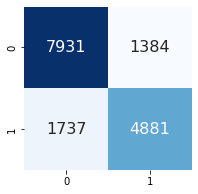

In [25]:
from sklearn.linear_model import LogisticRegression

model_1_logreg = Pipeline([
    ('full_transformer', full_transformer_1),
    ('log_reg', LogisticRegression(class_weight='balanced', n_jobs=-1))
])

test_model_1(model_1_logreg)

Fitting data...
Extracting data...
Extracting data...
Extracting data...
Extracting data...
- Train score: 0.9940525537973542
- F1 score (train): 0.992874109263658
Extracting data...
- Val score: 0.866691771794389
- F1 score (val): 0.8240848103362598


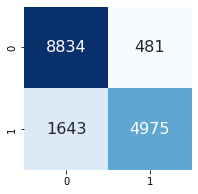

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostRegressor,GradientBoostingRegressor

model_1_rf = Pipeline([
    ('full_transformer', full_transformer_1),
    ('forest_reg', RandomForestClassifier(class_weight='balanced', n_jobs=-1))
])

test_model_1(model_1_rf)

Fitting data...
Extracting data...
Extracting data...
Extracting data...
Extracting data...
- Train score: 0.860162923980824
- F1 score (train): 0.8305340176913836
Extracting data...
- Val score: 0.8504989644134815
- F1 score (val): 0.8164869029275809


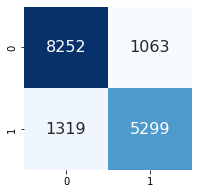

In [27]:
from sklearn.svm import SVC

model_1_svc = Pipeline([
    ('full_transformer', full_transformer_1),
    ('svc', SVC(class_weight='balanced'))
])

test_model_1(model_1_svc)

Although SVC has lesser F1 score compared to RandomForest classifier, it is selected as RandomForest classifier has overfitted to training data. SVC predictions can be finetuned by hyperparameter tuning.

Feature Extractor initiated...
Fitting data...
Extracting data...
Extracting data...
- Val score: 0.8504362015941757
- F1 score (val): 0.8163957161568688
Pkl File: model_1_svc.pkl


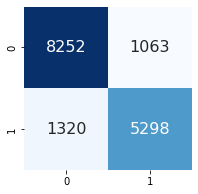

In [30]:
# Pickle File Creation

model_pipeline = Pipeline([
    ('col_transformer', columnTransformer_1),
    ('pca', TruncatedSVD(n_components=50)),
    ('svc', SVC(class_weight='balanced'))
])

feature_ex = FeatureExtractor()
feature_ex.fit(X_train_1,y_train_1)

X_train_transformed_1 = feature_ex.transform(X_train_1)
X_val_transformed_1 = feature_ex.transform(X_val_1)

model_pipeline.fit(X_train_transformed_1,y_train_1)
y_val_pred_1 = model_pipeline.predict(X_val_transformed_1)

print('- Val score:', model_pipeline.score(X_val_transformed_1,y_val_1))
print('- F1 score (val):', f1_score(y_val_1, y_val_pred_1))
conf_matrix(y_val_1,y_val_pred_1)

create_pkl(model_pipeline, "model_1_svc")

### Model 2 - Lead Time Prediction

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,confusion_matrix,f1_score,accuracy_score

def test_model_2(model):
    model.fit(X_train_2,y_train_2)
    y_train_pred_2 = model.predict(X_train_2)
    y_val_pred_2 = model.predict(X_val_2)

    print('- Train score:', model.score(X_train_2,y_train_2))
    print('- RMSE (train):', np.sqrt(mean_squared_error(y_train_2,y_train_pred_2)))
    print('- MAPE (train):', np.sqrt(mean_absolute_percentage_error(y_train_2,y_train_pred_2)))
    
    print('- Val score:', model.score(X_val_2,y_val_2))
    print('- RMSE (val):', np.sqrt(mean_squared_error(y_val_2,y_val_pred_2)))
    print('- MAPE (val):', np.sqrt(mean_absolute_percentage_error(y_val_2,y_val_pred_2)))

    # test_data = pd.read_csv('test_data.csv')
    # X_test, y_test = test_data, get_cancel_lead_time(test_data)
    # y_test_pred = model.predict(X_test)
    # print('- Test score:', {model.score(X_test,y_test)})
    # print('- F1 score (test):', f1_score(y_test, y_test_pred))

In [32]:
# Creating y values (Cancel Lead Time)

def get_cancel_lead_time(data):
    duplicate = data.copy()
    duplicate.rename(columns={'arrival_date_year':'arrival_year', 'arrival_date_month':'arrival_month', 'arrival_date_day_of_month':'arrival_day_of_month', 'arrival_date_week_number':'arrival_week_number'}, inplace=True)
    duplicate['reservation_status_date'] = pd.to_datetime(duplicate['reservation_status_date'], format='%Y-%m-%d')
    duplicate['arrival_month'] = duplicate.apply(lambda x: __get_month_index(x['arrival_month']), axis=1)
    duplicate['arrival_date'] = duplicate.apply(lambda x: __get_date(x['arrival_year'], x['arrival_month'], x['arrival_day_of_month']), axis=1)
    duplicate['arrival_date'] = pd.to_datetime(duplicate['arrival_date'], format='%Y-%m-%d')
    duplicate['cancel_lead_time'] = (duplicate['arrival_date'] - duplicate['reservation_status_date']).dt.days
    duplicate.loc[duplicate['cancel_lead_time'] < 0, 'cancel_lead_time'] = 0
    return duplicate['cancel_lead_time']

def __get_date(year,month,day):
    return str(year) + '-' + str(month) + '-' + str(day)

def __get_month_index(month):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    return months.index(month)+1

In [33]:
X_train_2,y_train_2 = train_data_filtered,get_cancel_lead_time(train_data)
X_val_2,y_val_2 = val_data_filtered,get_cancel_lead_time(val_data)

In [40]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import make_column_transformer,make_column_selector,ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA,TruncatedSVD

columnTransformer_2 = ColumnTransformer([
    ('cat_transformer', OneHotEncoder(), make_column_selector(dtype_include=object)),
    ('num_transformer', StandardScaler(), make_column_selector(dtype_include=int))
], remainder='passthrough')

full_transformer_2 = Pipeline([
    ('feature_extractor', FeatureExtractor()),
    ('col_transformer', columnTransformer_2),
    # ('pca', TruncatedSVD(n_components=30)),
])

# full_transformer.fit(train_data)
# transformed_data = full_transformer.transform(train_data)

Feature Extractor initiated...


### RandomForest

With 90% Accuracy 

pickle created - final_model.pkl

In [43]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesClassifier,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

model_2_rf = Pipeline([
    ('full_transformer', full_transformer_2),
    ('forest_reg', RandomForestRegressor(n_estimators=200,n_jobs=-1))
])

test_model_2(model_2_rf)

Fitting data...
Extracting data...
Extracting data...
Extracting data...
Extracting data...
- Train score: 0.9845035425409244
- RMSE (train): 9.355516316051906
- MAPE (train): 84902494.48818484
Extracting data...
- Val score: 0.9009834893328142
- RMSE (val): 23.631865449205055
- MAPE (train): 135412839.6494896


In [42]:
from sklearn.svm import SVR

model_2_svr = Pipeline([
    ('full_transformer', full_transformer_2),
    ('svr', SVR())
])

test_model_2(model_2_svr)

Fitting data...
Extracting data...
Extracting data...
Extracting data...
Extracting data...
- Train score: 0.6039217137962252
- RMSE (train): 47.297922291248206
- MAPE (train): 103227222.65117216
Extracting data...
- Val score: 0.6147457235108373
- RMSE (val): 46.61416729870745
- MAPE (train): 101441405.25843261


RandomForestRegressor is selected here as SVR does not perform well. RandomForest regressor can be finetuned by hyperparameter tuning.

In [46]:
# Final Pickle Creation

model_pipeline = Pipeline([
    ('full_transformer', columnTransformer_2),
    ('forest_reg', RandomForestRegressor(n_estimators=200,n_jobs=-1))
])

feature_ex = FeatureExtractor()
feature_ex.fit(X_train_2,y_train_2)

X_train_transformed_2 = feature_ex.transform(X_train_2)
X_val_transformed_2 = feature_ex.transform(X_val_2)

model_pipeline.fit(X_train_transformed_2,y_train_2)
y_val_pred_2 = model_pipeline.predict(X_val_transformed_2)

print('- Val score:', model_pipeline.score(X_val_transformed_2,y_val_2))
print('- RMSE (val):', np.sqrt(mean_squared_error(y_val_2,y_val_pred_2)))
print('- MAPE (val):', np.sqrt(mean_absolute_percentage_error(y_val_2,y_val_pred_2)))

create_pkl(model_pipeline, "model_2_rf")

Feature Extractor initiated...
Fitting data...
Extracting data...
Extracting data...


ValueError: columns are missing: {'cos_arrival_week_number', 'cos_arrival_day_of_week', 'cos_booking_month', 'sin_booking_week_number', 'cos_booking_day_of_month', 'cos_booking_week_number', 'sin_booking_day_of_week', 'cos_arrival_day_of_month', 'sin_booking_month', 'sin_arrival_month', 'sin_booking_day_of_month', 'sin_arrival_week_number', 'cos_booking_day_of_week', 'sin_arrival_day_of_month', 'sin_arrival_day_of_week', 'cos_arrival_month'}

### Only KMeans
85% Accuracy

Needs dimensionality reduction & Outlier elimination

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,ExtraTreesClassifier,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.cluster import KMeans

model_pipeline_2 = Pipeline([
    ('full_transformer', full_transformer),
    ('kmeans', KMeans()),
    ('forest_reg', RandomForestRegressor(n_estimators=200,n_jobs=-1))
])

model_pipeline_2
test_model(model_pipeline_2)

Fitting data...
Extracting data...
Extracting data...
Extracting data...
-Train score: 0.9767997400762126
Extracting data...
-Val score: 0.8490413952524607
Extracting data...
-Test score: 0.847905761402395


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(5,30))
grid_reg = GridSearchCV(model_pipeline_2, param_grid, cv=3, verbose=2)
grid_reg.fit(X_train,y_train)

In [18]:
grid_reg.cv_results_

{'mean_fit_time': array([ 6.29706645,  7.01004608,  7.94932501,  9.33605536,  9.98911484,
        10.56633393, 11.40360165, 12.72398973, 13.82118789, 15.25095661,
        16.12027073, 17.35291131, 18.56564116, 19.43427793, 20.25435583,
        22.22552292, 23.65226881, 23.9670399 , 24.99051499, 27.22242347,
        27.58068927, 28.41448601, 29.85953021, 31.32906485, 33.31172013]),
 'std_fit_time': array([0.30487176, 0.06555618, 0.11941891, 0.40494874, 0.38194668,
        0.21262757, 0.19487121, 0.31922822, 0.33325863, 0.29866431,
        0.57923295, 0.05992358, 0.51712059, 0.38469092, 0.16232149,
        0.45688405, 0.33699869, 0.34233357, 0.35459041, 0.75606311,
        0.67689689, 0.30430569, 1.13452941, 0.66050329, 1.07354413]),
 'mean_score_time': array([0.95380942, 0.93328913, 0.90576839, 0.9416515 , 0.97041345,
        0.92142542, 0.96610538, 0.94003503, 0.94882417, 0.94676503,
        0.91274166, 0.94996373, 0.94043167, 0.94402933, 0.94125064,
        0.94471049, 0.93732452, 0.9

In [14]:
grid_reg.best_params_

{'kmeans__n_clusters': 5}

In [15]:
grid_reg.score(X_val,y_val)

Extracting data...


0.8312649718319768

### KMeans with PCA

74% Accuracy with TruncatedSVD

In [2]:
# PCA with KMeans

from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor,ExtraTreesClassifier,AdaBoostRegressor,GradientBoostingRegressor

full_transformer.fit(X_train,y_train)
X_train_transformed = full_transformer.transform(X_train)
X_val_transformed = full_transformer.transform(X_val)

model_pipeline_pca = Pipeline([
    ('pca', TruncatedSVD(n_components=50)),
    ('kmeans', KMeans()),
    ('forest_reg', RandomForestRegressor(n_estimators=200,n_jobs=10))
])

model_pipeline_pca.fit(X_train_transformed,y_train)
y_pred = model_pipeline_pca.predict(X_val_transformed)

print(f'-Train score: {model_pipeline_pca.score(X_train_transformed,y_train)}')
print(f'-Val score: {model_pipeline_pca.score(X_val_transformed,y_val)}')


# test_model(model_pipeline_pca)

NameError: name 'full_transformer' is not defined

In [14]:
from sklearn.decomposition import PCA,TruncatedSVD

svd = TruncatedSVD()

svd.fit(X_train_transformed)

TruncatedSVD()

In [16]:
trans = svd.fit_transform(X_train_transformed)
X_train_transformed.shape, trans.shape 

(55486, 2)

In [17]:
trans

array([[ 2.11084818,  2.07338378],
       [ 2.56847194, -1.09083379],
       [ 2.79927329, -0.52270624],
       ...,
       [ 2.00360391, -0.24018114],
       [ 1.94718158,  2.2946249 ],
       [ 0.95843106, -0.86976872]])